<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Angel Gerardo De la Mora Wolburg. Diego Octavio Perez Urbina

**Fecha:** 15 de marzo del 2025.

**Expediente** : 742927
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea4-7

# Tarea 4: Clase 13

Código de solución estudiante 1
Angel Gerardo De la Mora

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

1. - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelos no lineales/Tarea 4/Housing.csv")

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
df.shape

(545, 13)

Revisar datos

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


En lo anterior vemos una descripcion de estadasticos basicos de nuestras variables numericas.

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


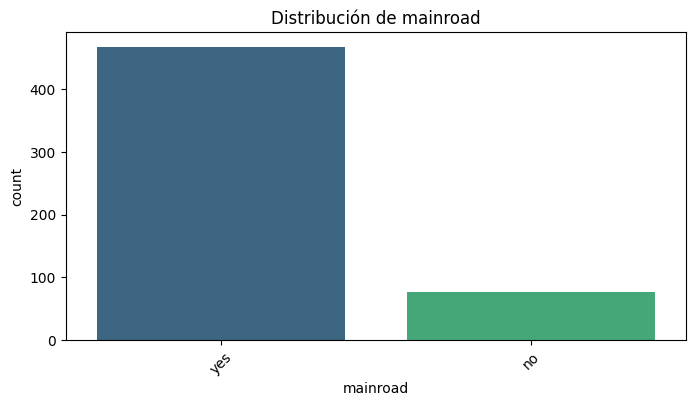

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


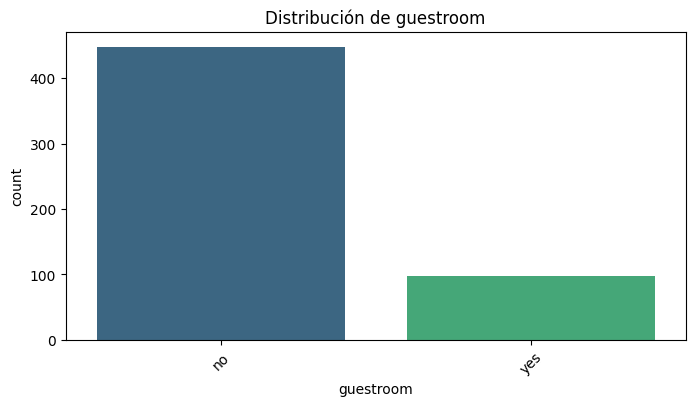

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


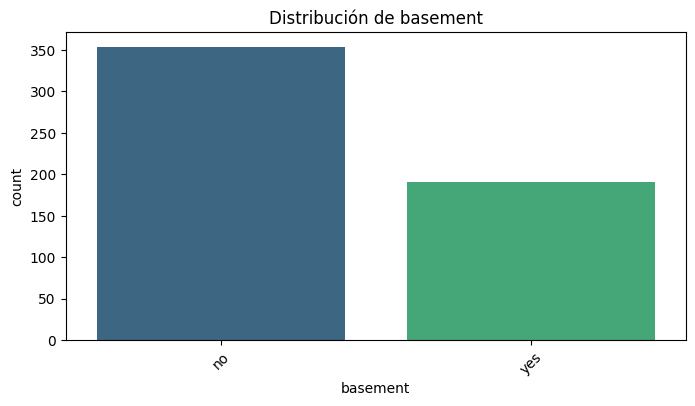

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


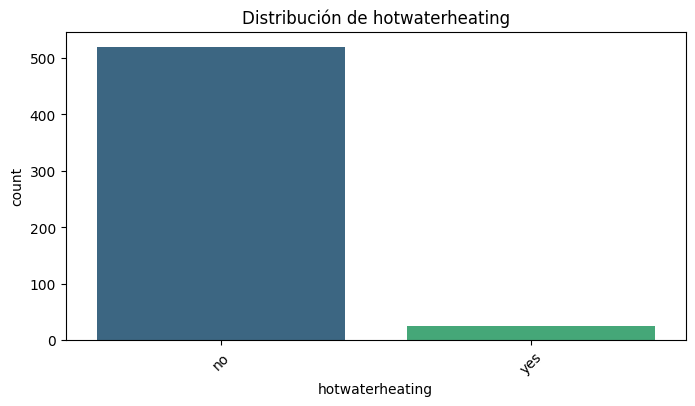

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


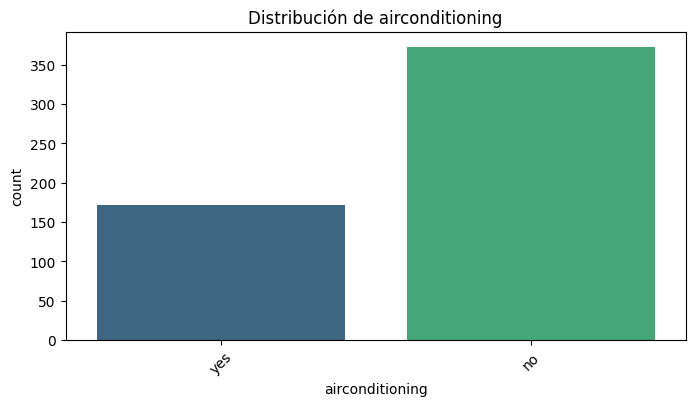

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


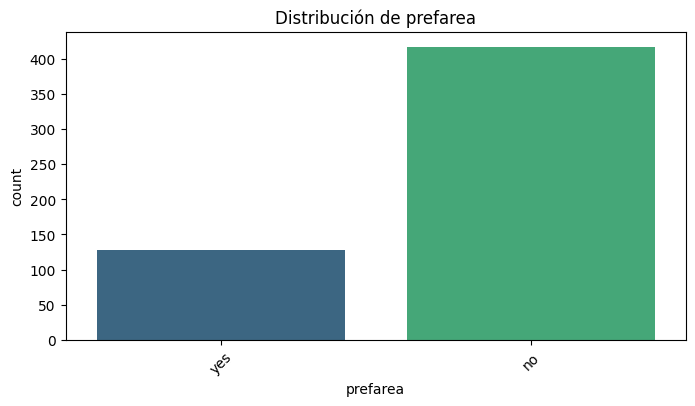

<ipython-input-10-626d9f843d5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


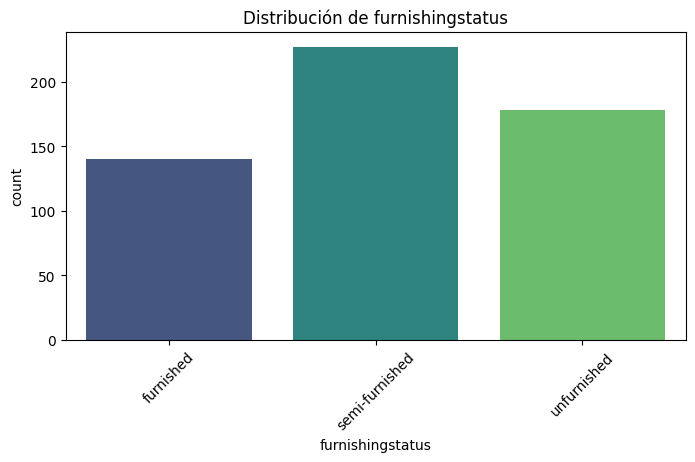

In [ ]:
df_cate = df.select_dtypes(include=['object'])
for col in df_cate:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

Observamos las variables categoricas y su conteo por valor unico

EDA

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Para este data set no hay datos nullos asi que podemos proseguir

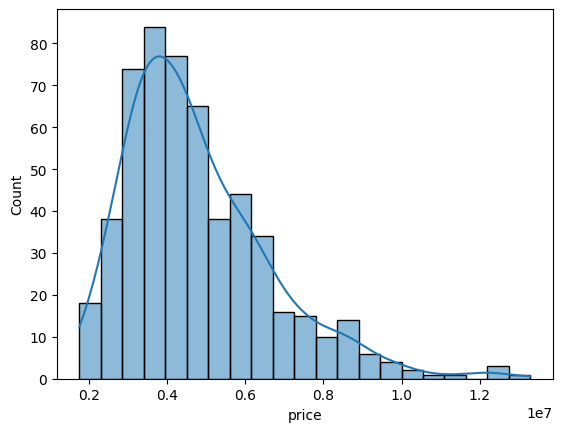

In [ ]:
sns.histplot(df['price'], kde=True)
plt.show()

Asimetría a la derecha: Esto indica que la mayoría de las propiedades tienen precios relativamente bajos, pero hay algunas propiedades con precios muy altos que elevan la media.

Presencia de outliers: Los precios más altos se encuentran en la derecha, lo que puede afectar algunos modelos. Podrías considerar aplicar tecnicas de normalizacion

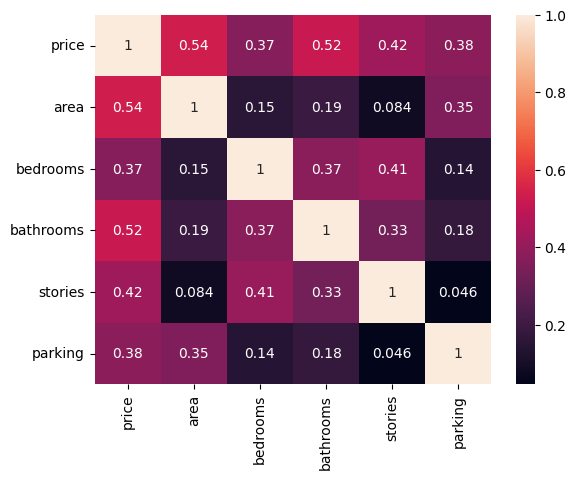

In [ ]:
num_df  = df.select_dtypes(include=np.number)
corr = num_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Parece que no hay varibles altamente correlacionadas

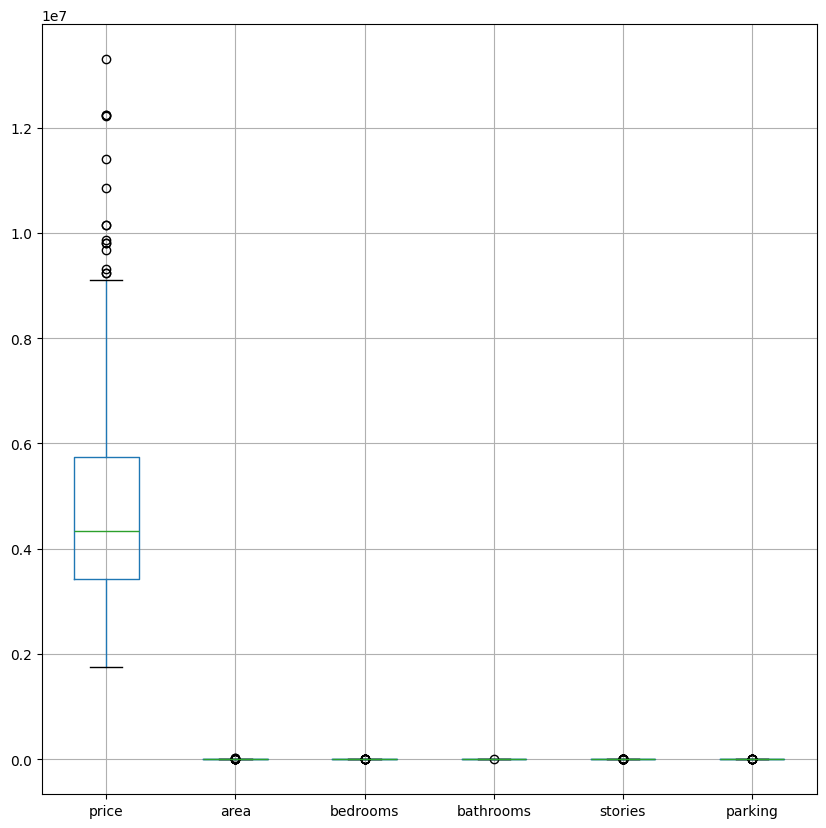

In [ ]:
df.boxplot(figsize=(10,10))
plt.show()

Observamos valores nullos en nuestro modelo y ya que estos valores extremos pueden distorsionar significativamente el entrenamiento del modelo y afectar la precisión de las predicciones procederemos a removerlos.

In [ ]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df = remove_outliers(df, 'price')

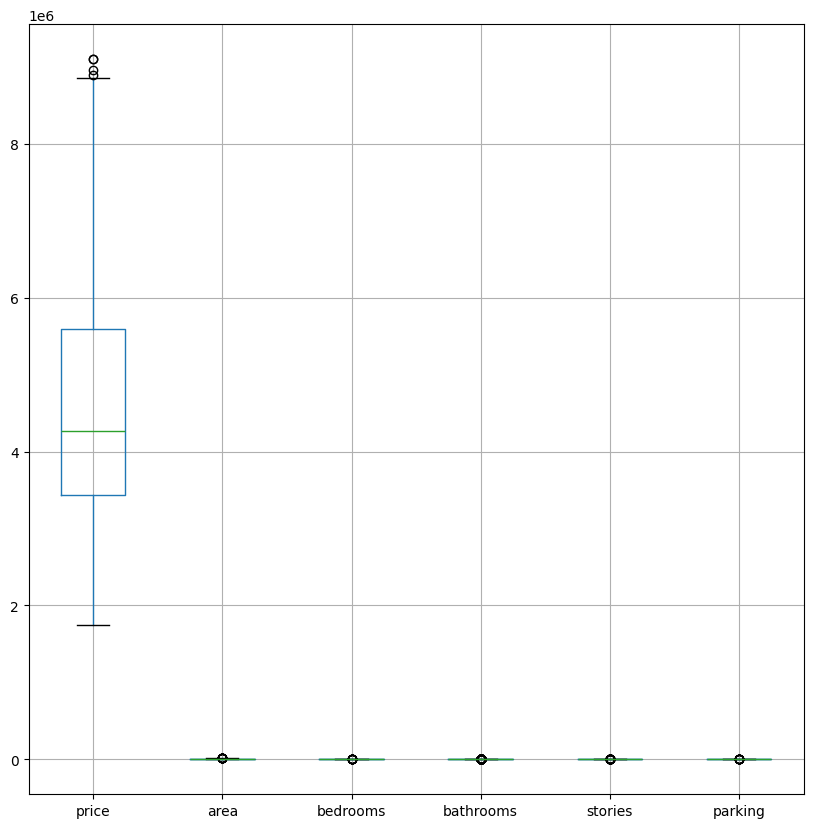

In [ ]:
df.boxplot(figsize=(10,10))
plt.show()

In [ ]:
df.shape

(530, 13)

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
17  8960000  8500         3          2        4      yes        no       no   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
17              no             yes        2       no        furnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished

In [ ]:
data = df.copy()

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']
data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

<ipython-input-20-c7d16da9f0f4>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


In [ ]:
data = pd.get_dummies(data, columns=["furnishingstatus"], drop_first=True).astype(int)

In [ ]:
data.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
15                                1                             0  
16                                0                             1  
17                                0                             0  
18                                0                             0  
19                                1                             0

In [ ]:
#Separ x y la Y
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
#Escalar la X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(530, 13)

In [ ]:
# Reshape para CNN
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [ ]:
X_scaled.shape

(530, 13, 1)

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((424, 13, 1), (106, 13, 1), (424,), (106,))

In [ ]:
#Modelo
tf.random.set_seed(5465)

model = Sequential([
  Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
  BatchNormalization(),
  MaxPooling1D(pool_size=2),

  Conv1D(filters=32, kernel_size=2, activation='relu'),
  BatchNormalization(),

  Conv1D(filters=16, kernel_size=2, activation='relu'),
  BatchNormalization(),

  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.3),
  Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 12, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 4, 16)               │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 16)               │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,033 (39.19 KB)

 Trainable params: 9,809 (38.32 KB)

 Non-trainable params: 224 (896.00 B)

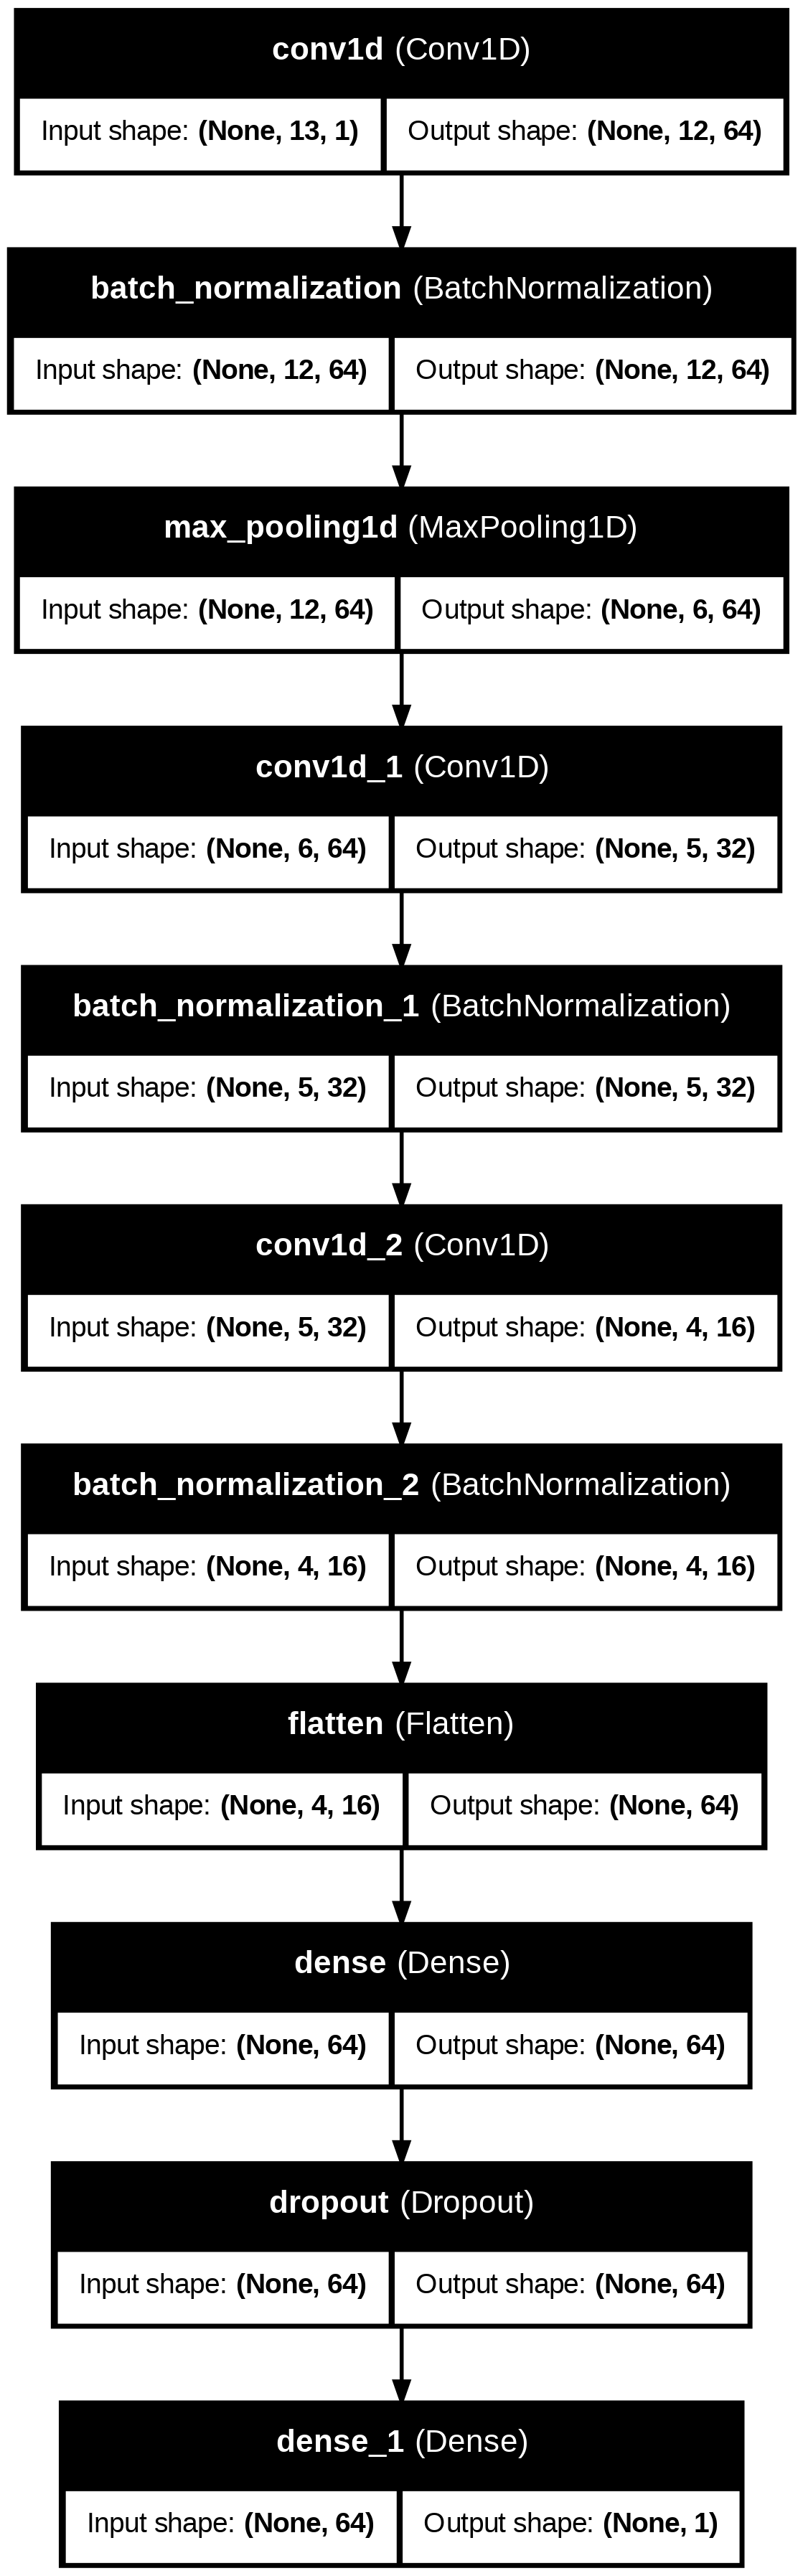

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1,callbacks=[early_stop])

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 23469056065536.0000 - mae: 4607607.0000 - val_loss: 23277395247104.0000 - val_mae: 4547193.5000
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23469037191168.0000 - mae: 4607605.0000 - val_loss: 23277391052800.0000 - val_mae: 4547193.0000
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23469016219648.0000 - mae: 4607602.5000 - val_loss: 23277386858496.0000 - val_mae: 4547193.0000
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23468988956672.0000 - mae: 4607600.5000 - val_loss: 23277386858496.0000 - val_mae: 4547192.5000
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23468947013632.0000 - mae: 4607596.0000 - val_loss: 23277380567040.0000 - val_mae: 4547191.5000
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23468896681984.0000 - mae: 4607590.5000 - val_loss: 23277374275584.0000 - val_mae: 4547191.5000
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - los

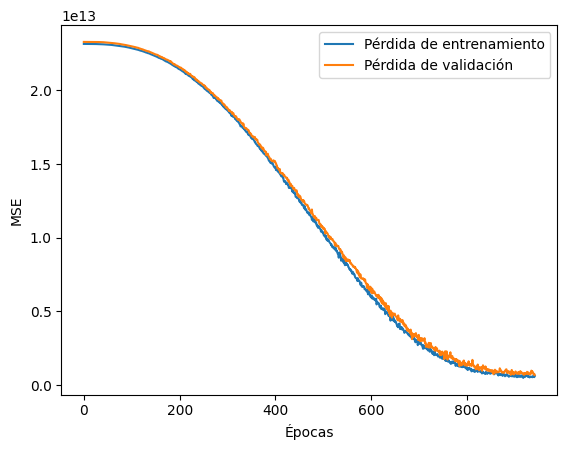

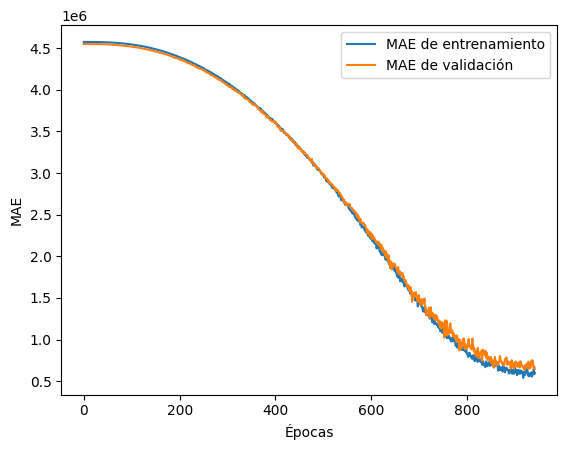

In [ ]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

Que nos da la grafica?
Pues con el paso de las epocas el MAE y el MSE del modelo disminuye lo que nos indica que el modelo esta aprendiendo y mejorando la capacidad de disminuir el error.

In [ ]:
# Generar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [ ]:
y_pred.shape

(106, 1)

In [ ]:
# Convertir de 2D a 1D
y_pred = y_pred.flatten()

In [ ]:
y_pred.shape

(106,)

In [ ]:
df_pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

df_pred = df_pred.reset_index(drop=True)

df_pred

y_test      y_pred
0    5530000  5183676.00
1    3430000  3568043.25
2    8680000  5667088.50
3    3780000  3329905.00
4    3920000  4150079.25
..       ...         ...
101  3773000  5393860.00
102  3150000  4075269.50
103  5600000  4107066.25
104  3780000  4292256.00
105  2275000  3710194.50

[106 rows x 2 columns]

Las predicciones no son perfectas y en general las subestima. Para una mejora podemos ajustar la tasa de aprendisaje, agregar mas epocas o considerar otros modelos.

2. - https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

1.2 Modelado con CNN

In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelos no lineales/Tarea 4/PRICE_AND_DEMAND_201801_NSW1.csv")

In [ ]:
df_2.head()

REGION       SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
0   NSW1  2018/01/01 00:30:00      6912.25  91.86      TRADE
1   NSW1  2018/01/01 01:00:00      6745.63  88.83      TRADE
2   NSW1  2018/01/01 01:30:00      6466.06  73.62      TRADE
3   NSW1  2018/01/01 02:00:00      6279.80  71.49      TRADE
4   NSW1  2018/01/01 02:30:00      6177.31  69.27      TRADE

In [ ]:
df_2.shape

(1488, 5)

In [ ]:
df_3 = df_2.copy()

In [ ]:
df_3['SETTLEMENTDATE'] = pd.to_datetime(df_3['SETTLEMENTDATE'])

In [ ]:
df_3.sort_values(by='SETTLEMENTDATE', inplace=True)

In [ ]:
df_3 = df_3['TOTALDEMAND'].values

In [ ]:
df_3.shape

(1488,)

In [ ]:
df_3

array([6912.25, 6745.63, 6466.06, ..., 7227.34, 7055.73, 6966.93])

Modelado con CNN univariados

In [ ]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Definir parámetros
n_steps = 24
n_features = 1

In [ ]:
X, y = split_univariate_sequence(df_3, n_steps)

In [ ]:
X.shape

(1464, 24)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
X.shape

(1464, 24, 1)

# Definimos nuestro modelo

model_1 = Sequential()
model_1.add(keras.layers.Input(shape=(n_steps, n_features)))
model_1.add(Conv1D(64, 2, activation='relu'))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))

In [ ]:
# Definir el modelo mejorado
model_1 = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(n_steps, n_features)),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(64, 3, activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1, activation='relu')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 22, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 22, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 9, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,625 (268.07 KB)

 Trainable params: 68,113 (266.07 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
history_1 = model_1.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 71231984.0000
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 68874296.0000
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 55230448.0000
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 26238862.0000
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8702481.0000
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7173819.0000
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6184175.0000
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5245492.5000
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4102926.0000
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2951540.2500
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2148142.0000
Epoch 12/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1703936.8750
Epoch 13/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1605811.1250
Epoch 14/1000
46/46 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
x_input = np.array(df_3[-n_steps:]).reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
print(f'Predicción: {yhat}')

Predicción: [[5921.082]]


In [ ]:
valor_real = df_3[-(n_steps + 1)]
print(f'Valor real esperado: {valor_real}')

Valor real esperado: 8313.72


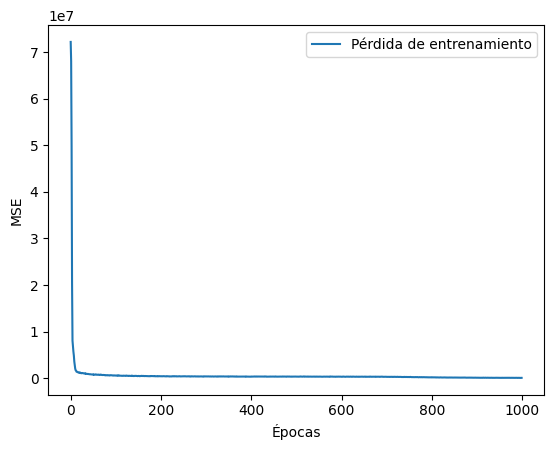

In [ ]:
plt.plot(history_1.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

2. Modelos con CNN multivariados

In [ ]:
demand = df_2['TOTALDEMAND'].values.reshape(-1, 1)
price = df_2['RRP'].values.reshape(-1, 1)

In [ ]:
price.shape, demand.shape

((1488, 1), (1488, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
demand_scaled = scaler.fit_transform(demand)
price_scaled = scaler.fit_transform(price)

In [ ]:
output_seq = demand_scaled + price_scaled
output_seq.shape

(1488, 1)

In [ ]:
output_seq

array([[0.41622866],
       [0.37532941],
       [0.25458973],
       ...,
       [0.29336642],
       [0.27528113],
       [0.28160967]])

In [ ]:
df_multi = np.hstack((demand_scaled, price_scaled, output_seq))
df_multi.shape

(1488, 3)

In [ ]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps = 24

X, y = split_multivariate_sequence(df_multi, n_steps)

n_features = X.shape[2]

X.shape, y.shape

((1465, 24, 2), (1465,))

In [ ]:
# Definimos nuestro modelo
model_2 = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(n_steps, n_features)),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(64, 3, activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1, activation='relu')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 22, 64)              │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 22, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 9, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 9, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 2, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 2, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,817 (268.82 KB)

 Trainable params: 68,305 (266.82 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
history_2 = model_2.fit(X, y, epochs=500, verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.3091
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9409
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7237
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5504
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4237
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3192
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2397
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1809
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1360
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1020
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0784
Epoch 12/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0612
Epoch 13/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0467
Epoch 14/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0374
Epoch 15/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

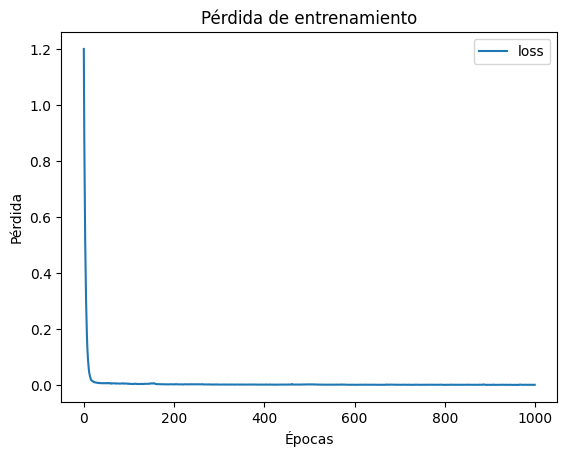

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de entrenamiento')
plt.show()

In [ ]:
# Probar el modelo con una entrada de ejemplo
x_input = df_multi[-24:, :-1].reshape(1, 24, 2)
yhat = model_2.predict(x_input, verbose=0)
print(f'Predicción: {scaler.inverse_transform(yhat.reshape(-1,1))}')

Predicción: [[107.4063]]


In [ ]:
real_value = df_2.iloc[24]['RRP']
real_value

70.47

## Modelo CNN con múltiples encabezamientos


In [ ]:
# Definir parámetros
n_steps = 24
n_features = 1

In [ ]:
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [ ]:
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [ ]:
from keras.layers import concatenate
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [ ]:
# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)

model_3.compile(optimizer='adam', loss='mse')

model_3.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 24, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 24, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 23, 64)         │            192 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 23, 64)         │            192 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 11, 64)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 11, 64)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 704)            │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 704)            │              0 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1408)           │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 50)             │         70,450 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             51 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 70,885 (276.89 KB)

 Trainable params: 70,885 (276.89 KB)

 Non-trainable params: 0 (0.00 B)

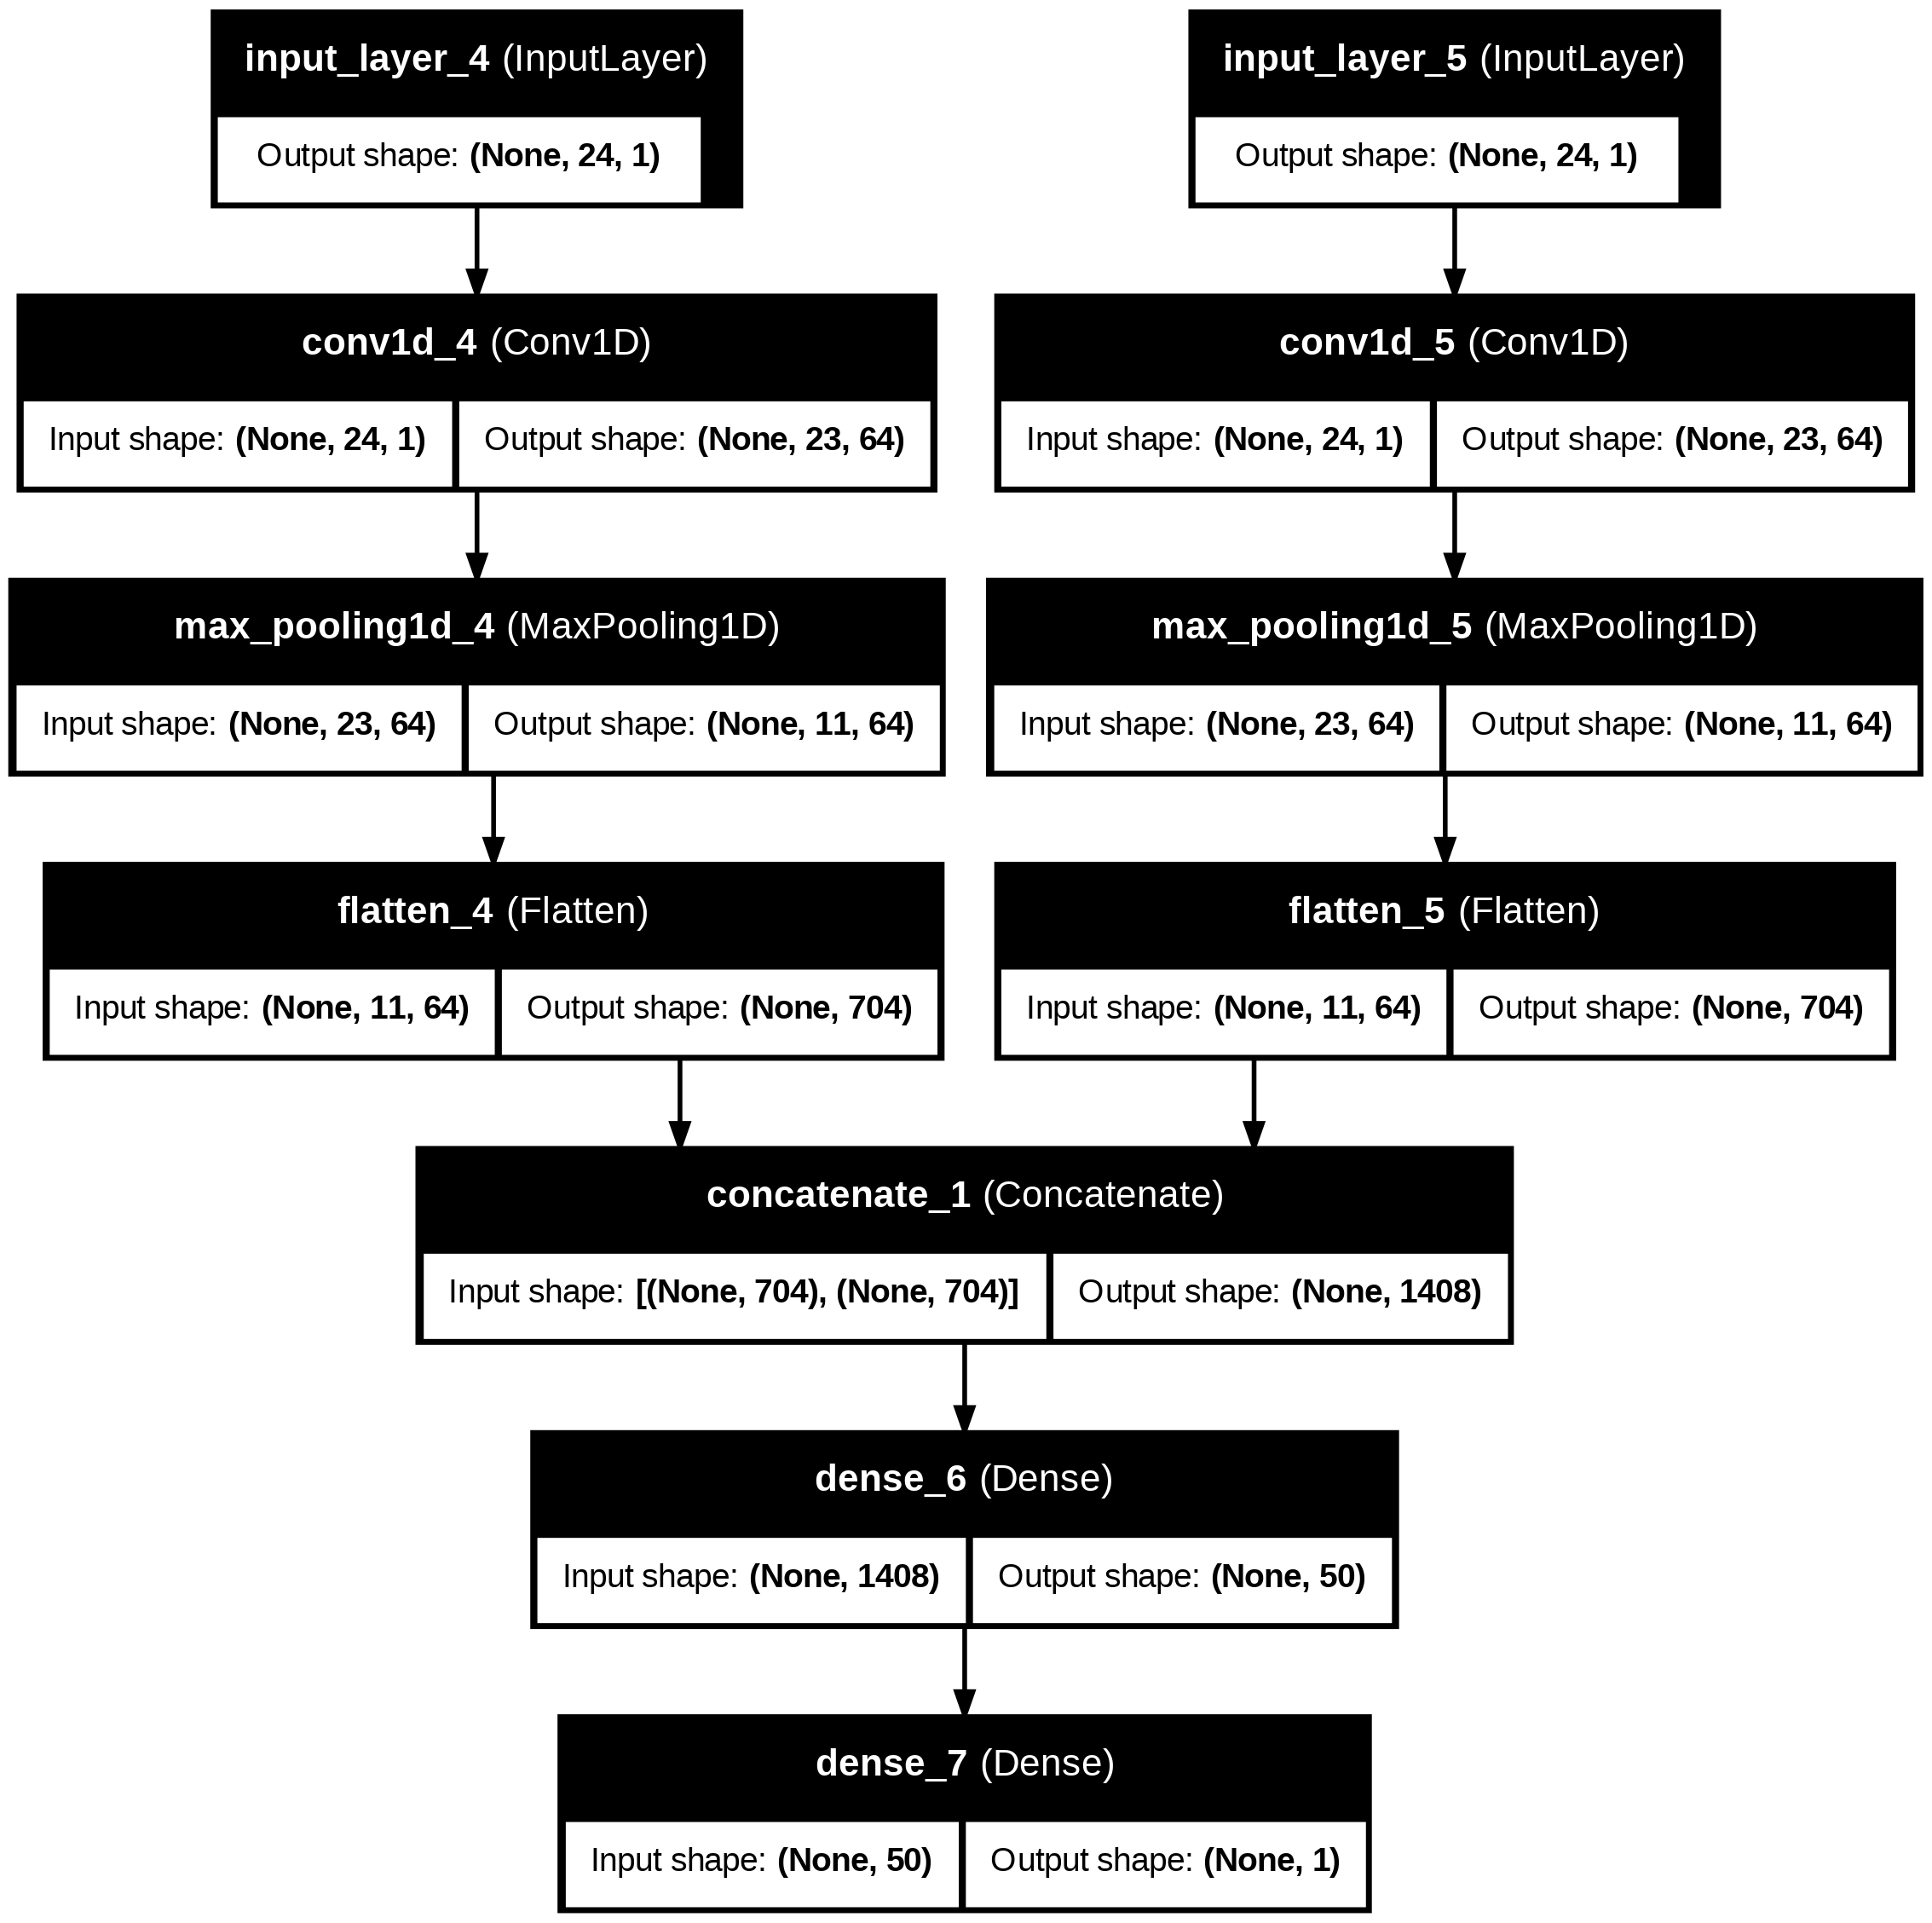

In [ ]:
plot_model(model_3, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
X[0].shape

(24, 2)

In [ ]:
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

In [ ]:
X1.shape, X2.shape

((1465, 24, 1), (1465, 24, 1))

In [ ]:
history_3 = model_3.fit([X1, X2], y, epochs=1000, verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028
Epoch 12/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0026
Epoch 13/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
Epoch 14/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025
Epoch 15/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

<Axes: >

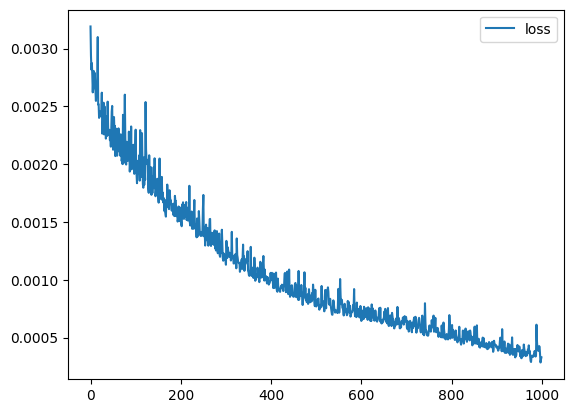

In [ ]:
pd.DataFrame(history_3.history).plot()

In [ ]:
x_input = df_multi[-24:, :-1]
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))

yhat = model_3.predict([x1, x2], verbose=0)

yhat_original = scaler.inverse_transform(yhat.reshape(-1, 1))

print(f'Predicción en escala original: {yhat_original[0][0]}')


Predicción en escala original: 95.69978332519531


##Múltiples series paralelas (multivariable forecasting)


In [ ]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
X_m, y_m = split_multiple_forecasting_sequence(df_multi, n_steps=24)

In [ ]:
X_m.shape, y_m.shape

((1464, 24, 3), (1464, 3))

In [ ]:
n_steps, X_m.shape[2]

(24, 3)

In [ ]:
n_features = X_m.shape[2]

# define model_4
model_4 = Sequential()
model_4.add(keras.layers.Input(shape=(n_steps, n_features)))
model_4.add(Conv1D(64, 2, activation='relu'))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 23, 64)              │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │          35,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,851 (140.04 KB)

 Trainable params: 35,851 (140.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
history_4 = model_4.fit(X_m, y_m, epochs=150, verbose=1, callbacks=[early_stop])

Epoch 1/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0535
Epoch 2/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071
Epoch 3/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 4/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041
Epoch 5/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037
Epoch 6/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034
Epoch 7/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032
Epoch 8/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 9/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029
Epoch 10/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028
Epoch 11/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027
Epoch 12/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 13/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 14/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 15/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoc

<Axes: >

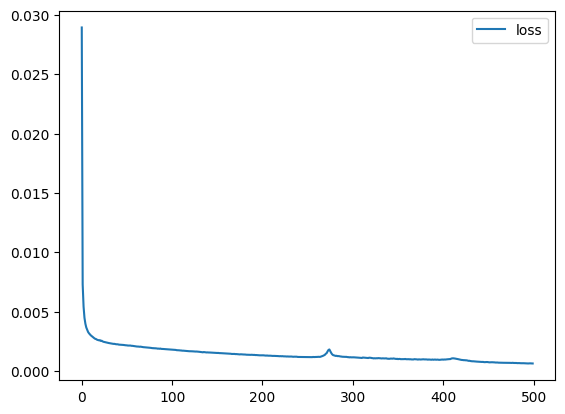

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
x_input = df_multi[-n_steps:, :].reshape(1, n_steps, n_features)

In [ ]:
# Hacer la predicción
yhat_scaled = model_4.predict(x_input, verbose=0)
yhat = scaler.inverse_transform(yhat_scaled)
print(f'Predicción: {yhat}')


Predicción: [[60.85565  61.448658 83.125824]]


Multi-output CNN Model


In [ ]:
n_features = X_m.shape[2]

visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [ ]:
output1 = Dense(1)(cnn)
output2 = Dense(1)(cnn)
output3 = Dense(1)(cnn)

In [ ]:
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')

In [ ]:
model_5.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 24, 3)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 23, 64)         │            448 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 11, 64)         │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 704)            │              0 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 50)             │         35,250 │ flatten_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             51 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1)              │             51 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1)              │             51 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 35,851 (140.04 KB)

 Trainable params: 35,851 (140.04 KB)

 Non-trainable params: 0 (0.00 B)

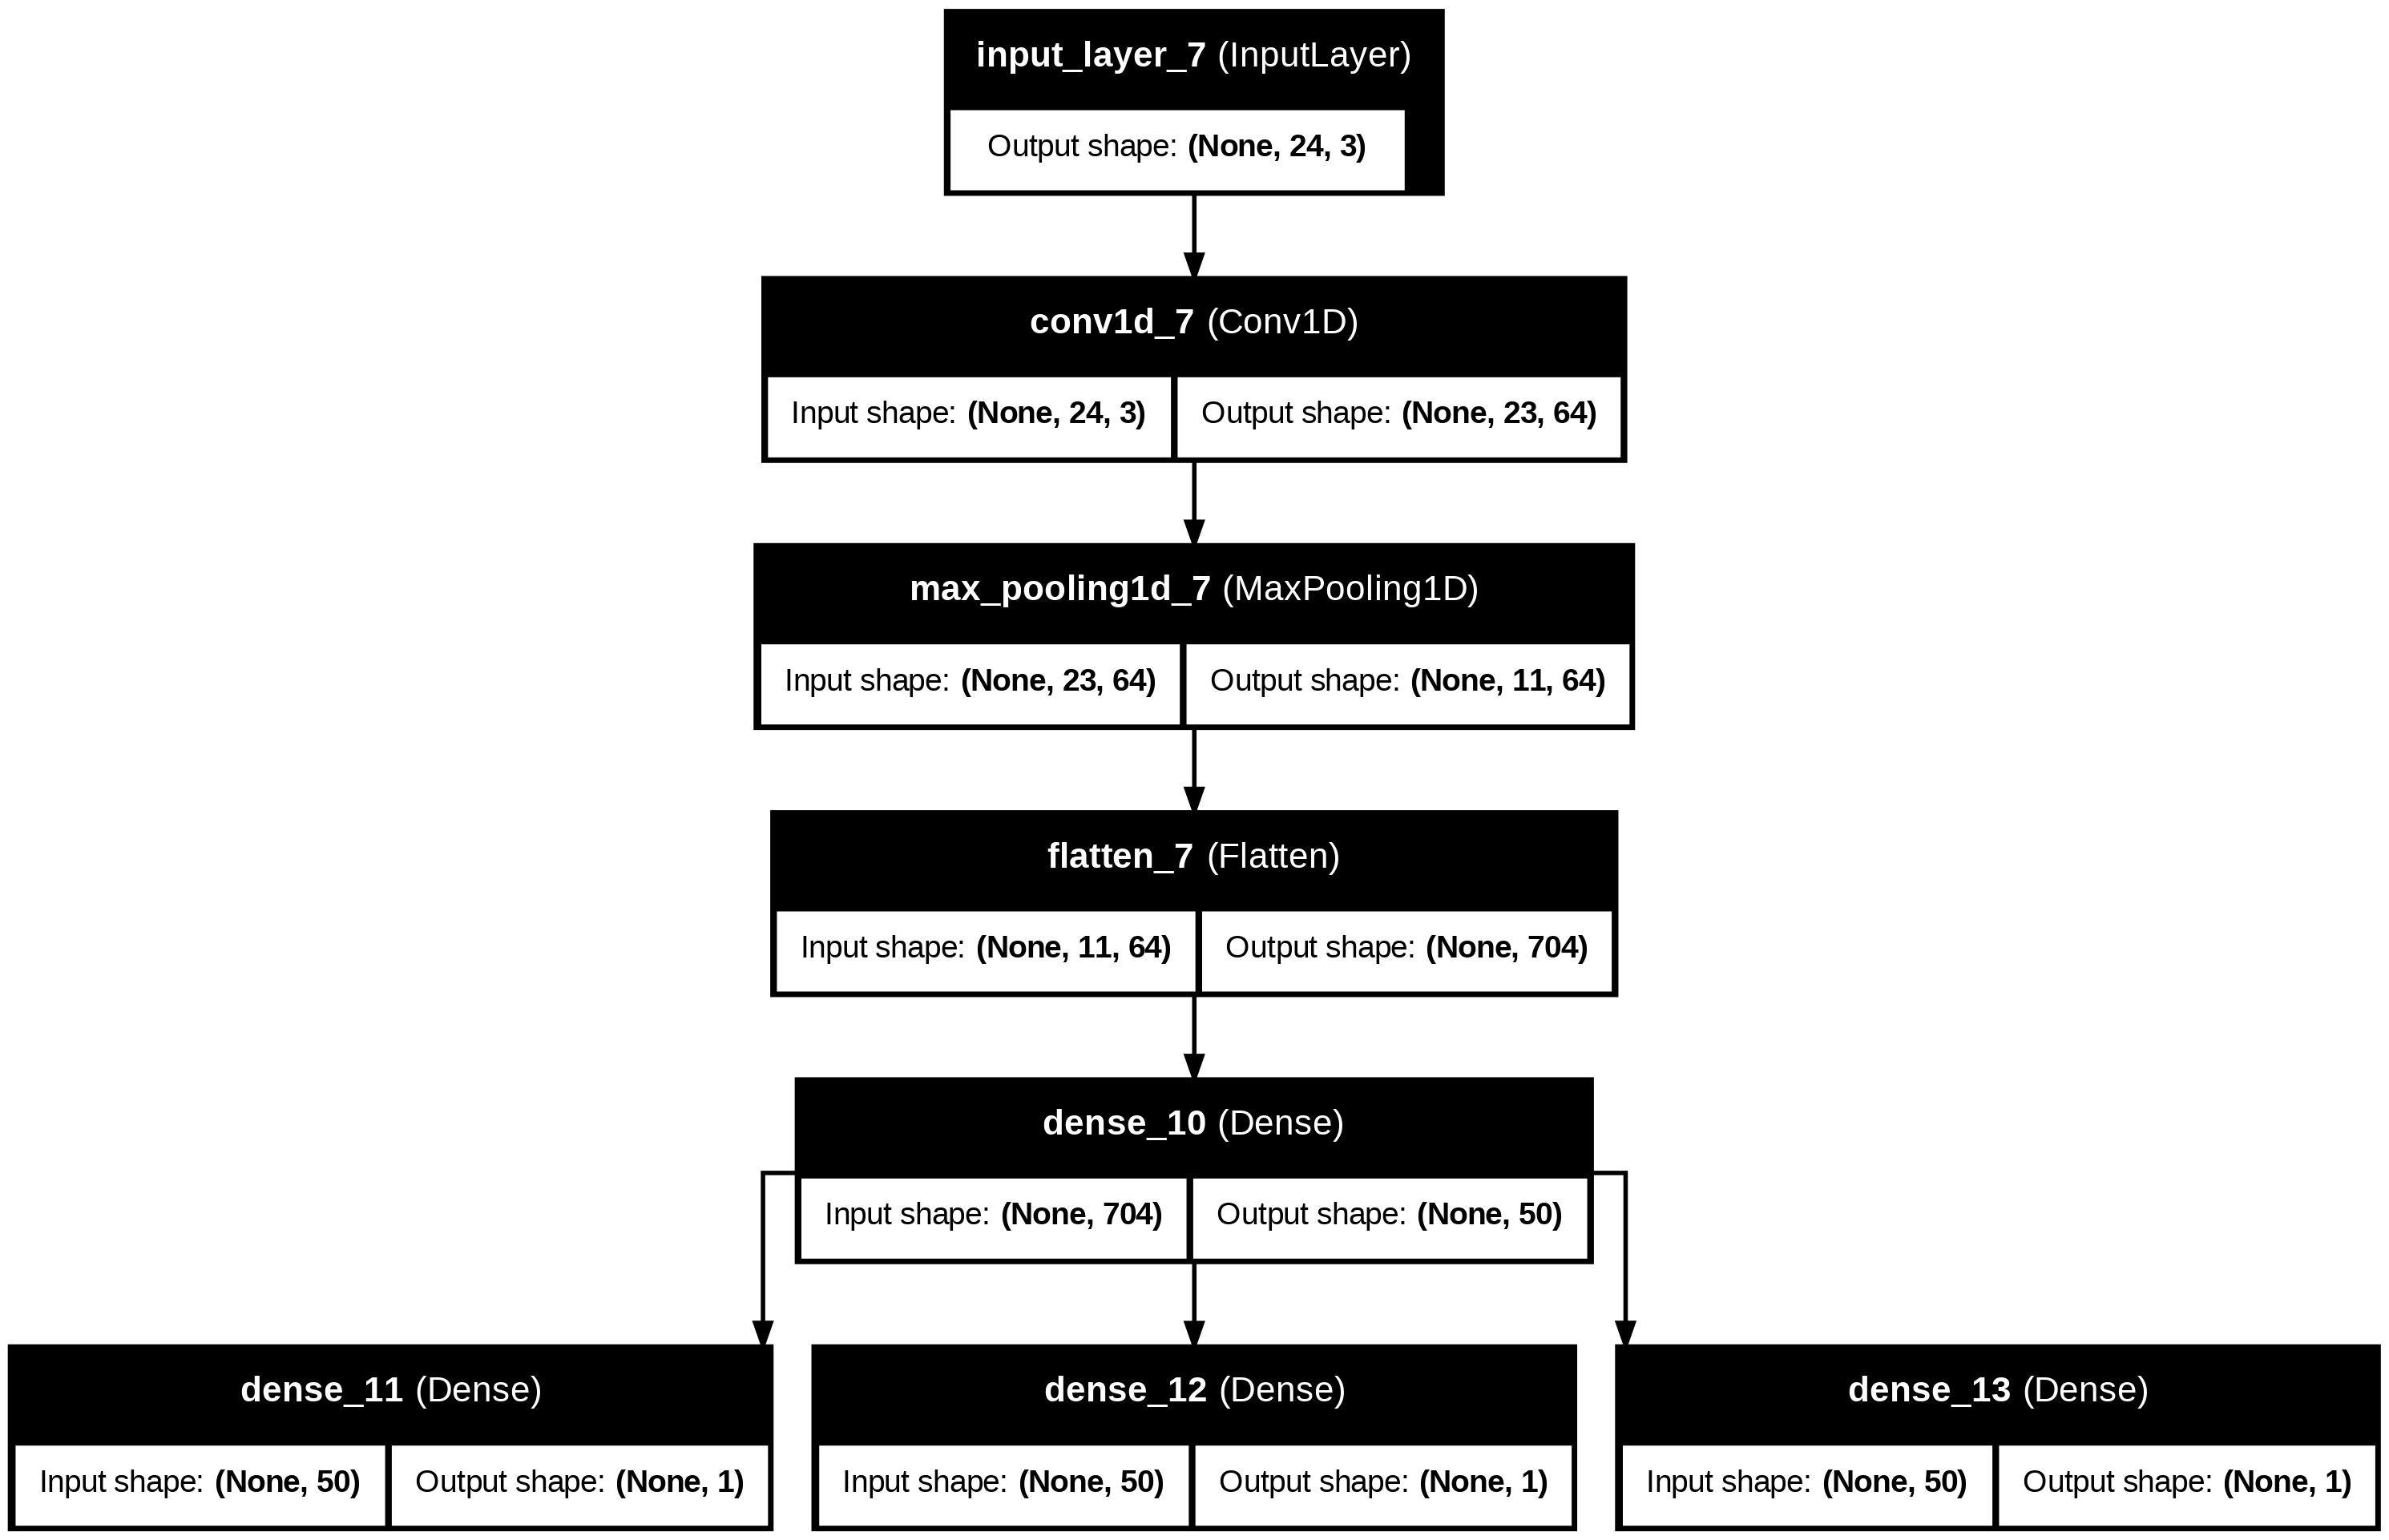

In [ ]:
plot_model(model_5, show_shapes=True, show_layer_names=True)

In [ ]:
y_m.shape#[:, 0]

(1464, 3)

In [ ]:
y1 = y_m[:, 0].reshape((y_m.shape[0], 1))
y2 = y_m[:, 1].reshape((y_m.shape[0], 1))
y3 = y_m[:, 2].reshape((y_m.shape[0], 1))

In [ ]:
y1.shape, y2.shape, y3.shape

((1464, 1), (1464, 1), (1464, 1))

In [ ]:
history_5 = model_5.fit(X_m, [y1,y2,y3], epochs=150, verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - dense_11_loss: 7.3485e-04 - dense_12_loss: 0.0022 - dense_13_loss: 0.0036 - loss: 0.0066
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - dense_11_loss: 7.2150e-04 - dense_12_loss: 0.0024 - dense_13_loss: 0.0035 - loss: 0.0067
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - dense_11_loss: 6.2548e-04 - dense_12_loss: 0.0024 - dense_13_loss: 0.0034 - loss: 0.0065
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - dense_11_loss: 7.8254e-04 - dense_12_loss: 0.0023 - dense_13_loss: 0.0036 - loss: 0.0066
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - dense_11_loss: 6.2239e-04 - dense_12_loss: 0.0022 - dense_13_loss: 0.0033 - loss: 0.0062
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - dense_11_loss: 6.3620e-04 - dense_12_loss: 0.0022 - dense_13_loss: 0.0032 - loss: 0.0061
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - dense_11_loss: 6.6256e-04 - dense_12_loss: 0.0024 - dense_13_loss: 0.0038 - loss: 0

<Axes: >

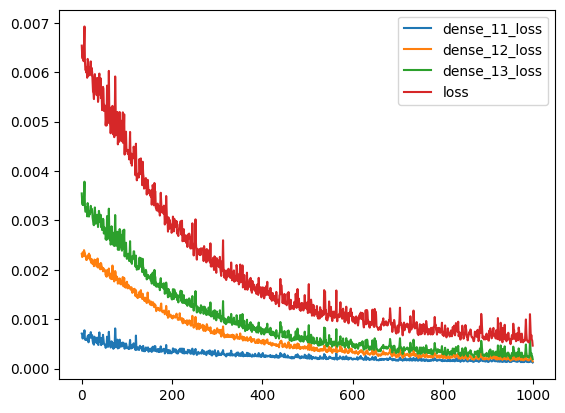

In [ ]:
pd.DataFrame(history_5.history).plot()

In [ ]:
x_input = df_multi[-n_steps:, :].reshape((1, n_steps, n_features))

yhat1, yhat2, yhat3 = model_5.predict(x_input, verbose=0)

In [ ]:
yhat1 = scaler.inverse_transform(yhat1.reshape(-1, 1))
yhat2 = scaler.inverse_transform(yhat2.reshape(-1, 1))
yhat3 = scaler.inverse_transform(yhat3.reshape(-1, 1))

print(f'Predicción 1: {yhat1}')
print(f'Predicción 2: {yhat2}')
print(f'Predicción 3: {yhat3}')

Predicción 1: [[63.482693]]
Predicción 2: [[60.93364]]
Predicción 3: [[83.85685]]


Modelos CNN de pasos múltiples

In [ ]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
df_pasos_mul = df_2['TOTALDEMAND'].values.reshape(-1, 1)
df_pasos_mul

array([[6912.25],
       [6745.63],
       [6466.06],
       ...,
       [7227.34],
       [7055.73],
       [6966.93]])

In [ ]:
n_steps_in, n_steps_out = 24, 3
X, y = split_univariate_sequence_m_step(df_pasos_mul, n_steps_in, n_steps_out)
[print(X[i], y[i]) for i in range(len(X))];

Se han truncado las últimas 5000 líneas del flujo de salida.
 [ 9497.9 ]
 [ 9345.79]
 [ 9116.59]
 [ 8958.55]
 [ 8728.83]
 [ 8593.37]] [[8305.12]
 [7996.62]
 [7832.44]]
[[ 9505.58]
 [ 9641.34]
 [ 9748.67]
 [ 9798.03]
 [ 9929.31]
 [ 9998.82]
 [10140.2 ]
 [10294.49]
 [10292.9 ]
 [10388.62]
 [10345.07]
 [10338.91]
 [10136.96]
 [ 9912.51]
 [ 9708.3 ]
 [ 9583.23]
 [ 9616.94]
 [ 9497.9 ]
 [ 9345.79]
 [ 9116.59]
 [ 8958.55]
 [ 8728.83]
 [ 8593.37]
 [ 8305.12]] [[7996.62]
 [7832.44]
 [7564.27]]
[[ 9641.34]
 [ 9748.67]
 [ 9798.03]
 [ 9929.31]
 [ 9998.82]
 [10140.2 ]
 [10294.49]
 [10292.9 ]
 [10388.62]
 [10345.07]
 [10338.91]
 [10136.96]
 [ 9912.51]
 [ 9708.3 ]
 [ 9583.23]
 [ 9616.94]
 [ 9497.9 ]
 [ 9345.79]
 [ 9116.59]
 [ 8958.55]
 [ 8728.83]
 [ 8593.37]
 [ 8305.12]
 [ 7996.62]] [[7832.44]
 [7564.27]
 [7408.02]]
[[ 9748.67]
 [ 9798.03]
 [ 9929.31]
 [ 9998.82]
 [10140.2 ]
 [10294.49]
 [10292.9 ]
 [10388.62]
 [10345.07]
 [10338.91]
 [10136.96]
 [ 9912.51]
 [ 9708.3 ]
 [ 9583.23]
 [ 9616.94]
 [ 949

In [ ]:
X.shape, y.shape

((1462, 24, 1), (1462, 3, 1))

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(1462, 24, 1)

In [ ]:
model_6 = Sequential()
model_6.add(keras.layers.Input(shape=(n_steps, n_features)))
model_6.add(Conv1D(64, 2, activation='relu'))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))

In [ ]:
model_6.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 23, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │          35,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,595 (139.04 KB)

 Trainable params: 35,595 (139.04 KB)

 Non-trainable params: 0 (0.00 B)

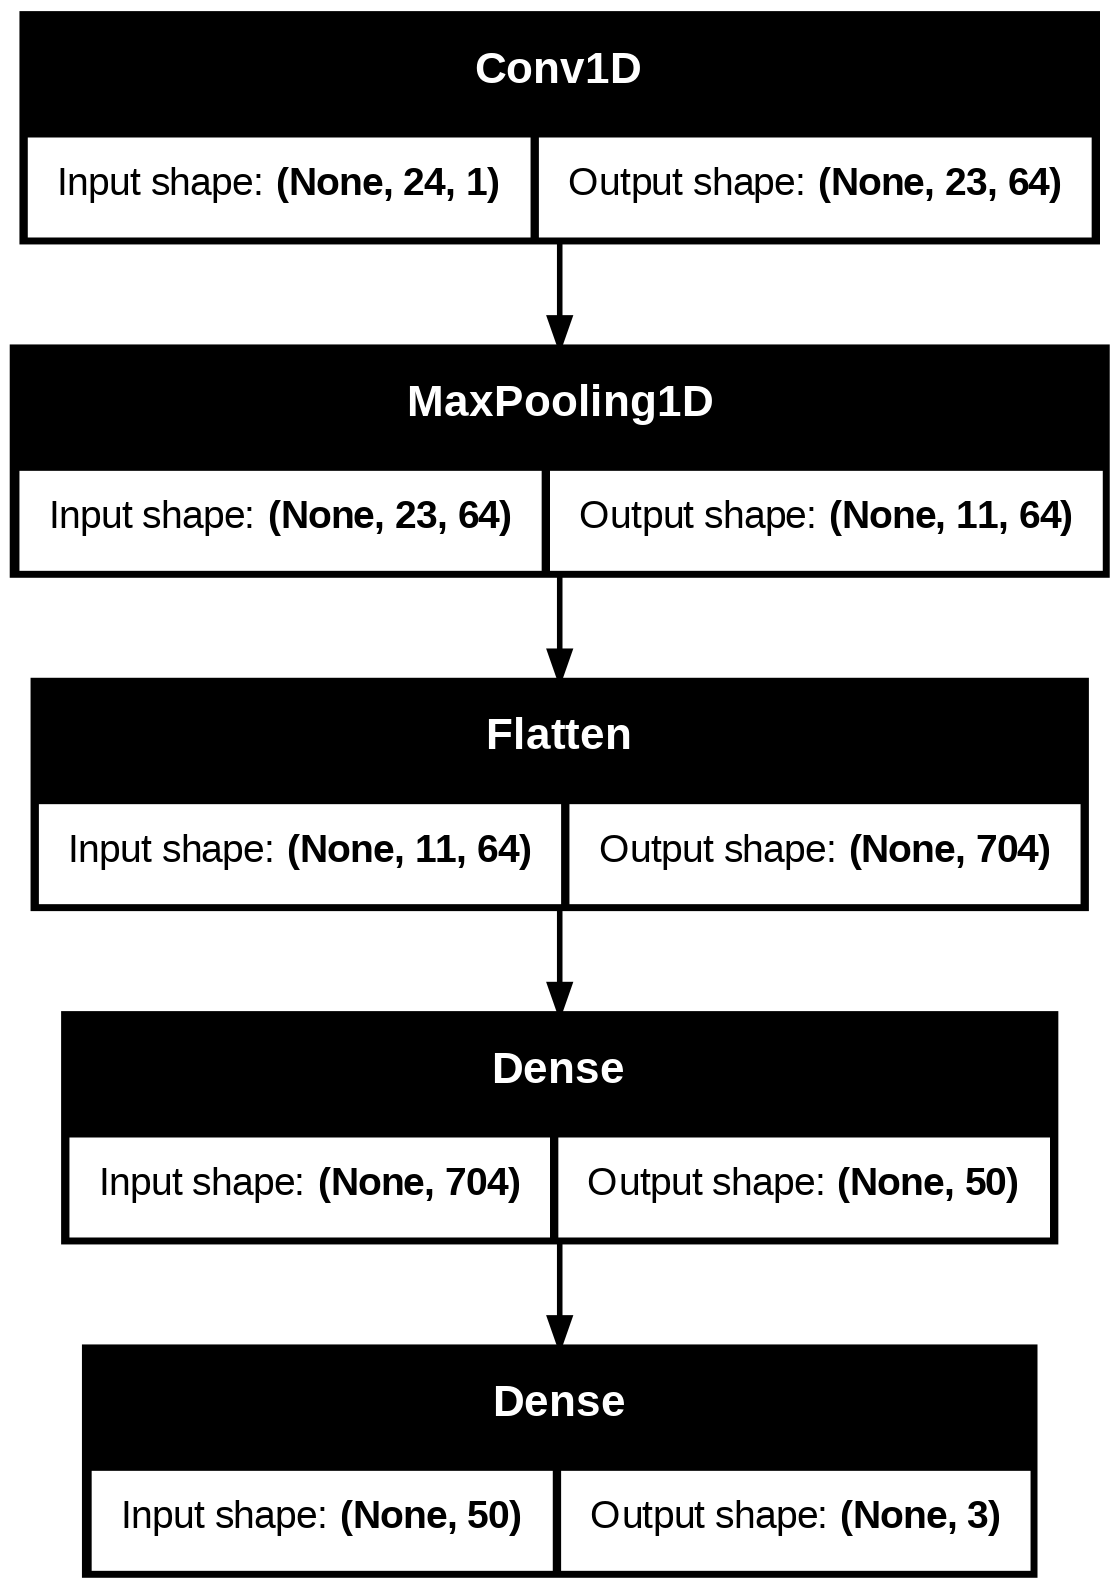

In [ ]:
plot_model(model_6, show_layer_names=False, show_shapes=True,)

In [ ]:
history_6 = model_6.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30678054.0000
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2607236.7500
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2299340.2500
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1912905.3750
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1354244.5000
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 995782.5625 
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 734162.0000
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 577081.2500
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 503322.3750
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 435365.8438
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 423806.1250
Epoch 12/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 386094.5312
Epoch 13/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 384150.0938
Epoch 14/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

<Axes: >

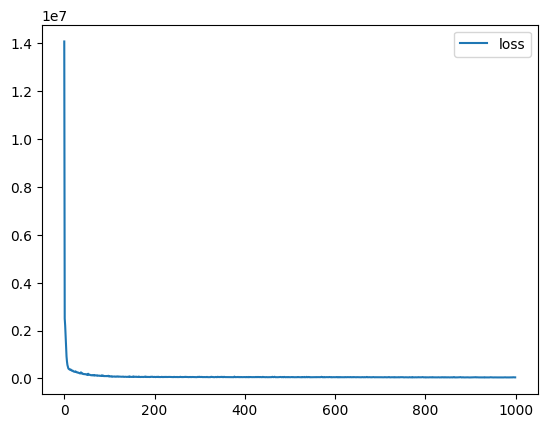

In [ ]:
pd.DataFrame(history_6.history).plot()

In [ ]:
x_input = X[-1].reshape((1, n_steps, n_features))

yhat = model_6.predict(x_input, verbose=0)

print("Predicción:", yhat)


Predicción: [[7160.036  7091.6797 7002.328 ]]


In [ ]:
def split_multivariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()

    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        if out_end_ix > len(sequence):
            break

        # Asegurar que seq_x y seq_y sean matrices de 2D
        seq_x = sequence[i:end_ix, :]
        seq_y = sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [ ]:
df_pasos_mul_2 = df_2['TOTALDEMAND'].values.reshape(-1, 1)
df_pasos_mul_2.shape

(1488, 1)

In [ ]:
df_pasos_mul.shape

(1488, 1)

In [ ]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 24, 3

X, y = split_multivariate_sequence_m_step(df_pasos_mul_2, n_steps_in, n_steps_out)

In [ ]:
X.shape, y.shape

((1462, 24, 1), (1462, 3, 1))

In [ ]:
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

Se han truncado las últimas 5000 líneas del flujo de salida.
 [ 9497.9 ]
 [ 9345.79]
 [ 9116.59]
 [ 8958.55]
 [ 8728.83]
 [ 8593.37]] [[8305.12]
 [7996.62]
 [7832.44]]
[[ 9505.58]
 [ 9641.34]
 [ 9748.67]
 [ 9798.03]
 [ 9929.31]
 [ 9998.82]
 [10140.2 ]
 [10294.49]
 [10292.9 ]
 [10388.62]
 [10345.07]
 [10338.91]
 [10136.96]
 [ 9912.51]
 [ 9708.3 ]
 [ 9583.23]
 [ 9616.94]
 [ 9497.9 ]
 [ 9345.79]
 [ 9116.59]
 [ 8958.55]
 [ 8728.83]
 [ 8593.37]
 [ 8305.12]] [[7996.62]
 [7832.44]
 [7564.27]]
[[ 9641.34]
 [ 9748.67]
 [ 9798.03]
 [ 9929.31]
 [ 9998.82]
 [10140.2 ]
 [10294.49]
 [10292.9 ]
 [10388.62]
 [10345.07]
 [10338.91]
 [10136.96]
 [ 9912.51]
 [ 9708.3 ]
 [ 9583.23]
 [ 9616.94]
 [ 9497.9 ]
 [ 9345.79]
 [ 9116.59]
 [ 8958.55]
 [ 8728.83]
 [ 8593.37]
 [ 8305.12]
 [ 7996.62]] [[7832.44]
 [7564.27]
 [7408.02]]
[[ 9748.67]
 [ 9798.03]
 [ 9929.31]
 [ 9998.82]
 [10140.2 ]
 [10294.49]
 [10292.9 ]
 [10388.62]
 [10345.07]
 [10338.91]
 [10136.96]
 [ 9912.51]
 [ 9708.3 ]
 [ 9583.23]
 [ 9616.94]
 [ 949

In [ ]:
n_features = X.shape[2]

# Definir el modelo
model_7 = Sequential()
model_7.add(keras.layers.Input(shape=(n_steps, n_features)))
model_7.add(Conv1D(64, 2, activation='relu'))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


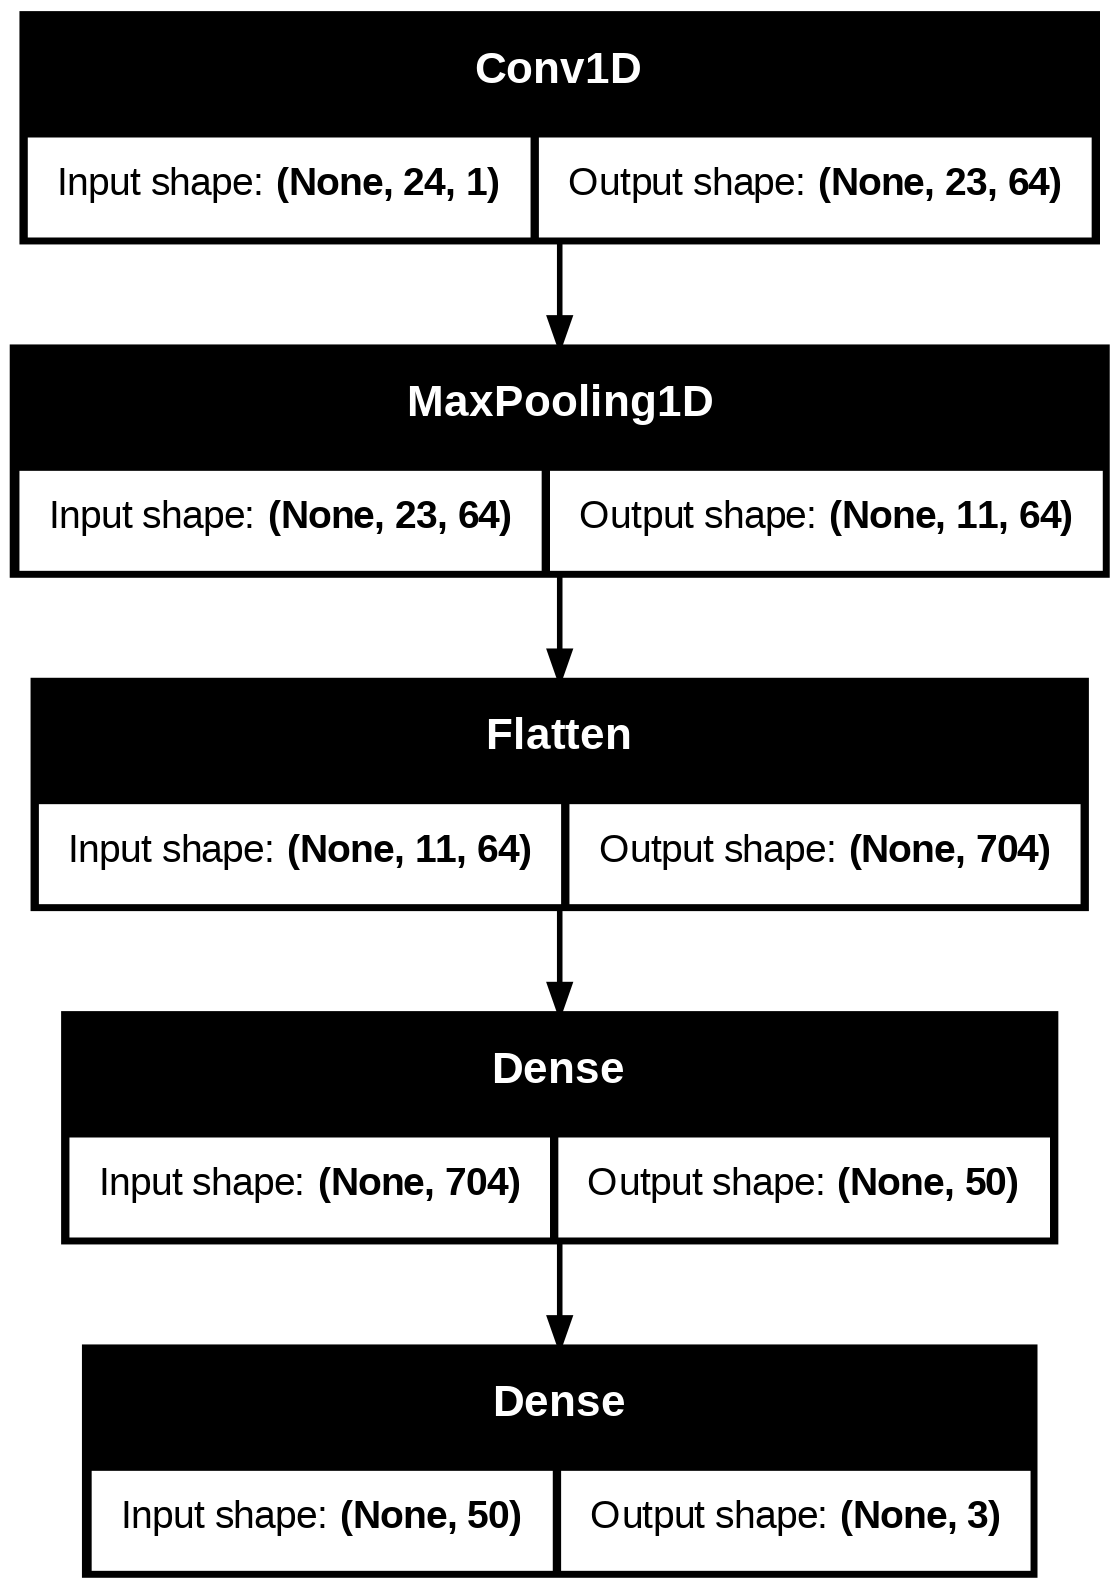

In [ ]:
plot_model(model_7, show_layer_names=False, show_shapes=True,)

In [ ]:
# fit model_7
model_7.fit(X, y, epochs=1000, verbose=1)

model_7.summary()

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 17260644.0000
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2418416.7500
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1832653.6250
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1338355.8750
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 976688.7500
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 761995.8750
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 603231.5625
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 554883.8125
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 461031.7812
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 446299.8438
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 403751.5000
Epoch 12/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 392843.2500
Epoch 13/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 369778.1562
Epoch 14/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)                   │ (None, 23, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 50)                  │          35,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,787 (417.14 KB)

 Trainable params: 35,595 (139.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,192 (278.10 KB)

In [ ]:
x_input = df_pasos_mul_2[-n_steps:].reshape(1, n_steps, n_features)

y_pred = model_7.predict(x_input, verbose=0)

y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

print("Predicción escalada:", y_pred)

print("Predicción original:", y_pred_original)


Predicción escalada: [[6797.75  6661.535 6495.379]]
Predicción original: [[1320843.4]
 [1294376.9]
 [1262092.8]]


 Serie temporal multivariada predicción múltiple de cada entrada

In [ ]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
df_multi3 = df_multi.copy()
df_multi3

array([[0.15220396, 0.2640247 , 0.41622866],
       [0.12689915, 0.24843026, 0.37532941],
       [0.08444048, 0.17014925, 0.25458973],
       ...,
       [0.2000571 , 0.09330932, 0.29336642],
       [0.17399446, 0.10128667, 0.27528113],
       [0.16050828, 0.12110139, 0.28160967]])

In [ ]:
df_multi3.shape

(1488, 3)

In [ ]:
n_steps_in, n_steps_out = 24, 3

X, y = split_multivariate_sequence_m_step_parallel(df_multi3, n_steps_in, n_steps_out)

In [ ]:
X.shape, y.shape

((1462, 24, 3), (1462, 3, 3))

In [ ]:
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

Se han truncado las últimas 5000 líneas del flujo de salida.
 [0.54489014 0.23695317 0.7818433 ]
 [0.52178898 0.22135872 0.74314771]
 [0.48698007 0.13041688 0.61739695]
 [0.46297832 0.09294905 0.55592737]
 [0.42809043 0.09068451 0.51877494]
 [0.40751794 0.17416366 0.5816816 ]] [[0.36374102 0.12902728 0.49276829]
 [0.3168887  0.15141534 0.46830404]
 [0.29195446 0.11621204 0.40816651]]
[[0.54605651 0.34431292 0.89036943]
 [0.56667456 0.41616058 0.98283514]
 [0.58297492 0.37884714 0.96182206]
 [0.59047129 0.42089552 1.01136681]
 [0.61040896 0.50622748 1.11663644]
 [0.62096554 0.49629439 1.11725993]
 [0.64243711 0.35270201 0.99513912]
 [0.66586934 0.34431292 1.01018226]
 [0.66562787 0.35815749 1.02378535]
 [0.68016499 0.44590839 1.12607338]
 [0.673551   0.49768399 1.17123499]
 [0.67261547 0.42856408 1.10117954]
 [0.64194505 0.40540401 1.04734906]
 [0.60785752 0.31322697 0.92108449]
 [0.57684387 0.27076686 0.84761073]
 [0.55784932 0.28126608 0.8391154 ]
 [0.5629689  0.2624807  0.8254496 ]
 

In [ ]:
y.shape

(1462, 3, 3)

In [ ]:
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
y.shape

(1462, 9)

In [ ]:
n_features = X.shape[2]

# Definimos nuestro modelo
model_8 = Sequential()
model_8.add(keras.layers.Input(shape=(n_steps, n_features)))
model_8.add(Conv1D(64, 2, activation='relu'))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_output))

In [ ]:
model_8.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model_8
history_8 = model_8.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0960
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0184
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 12/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 13/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042
Epoch 14/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 15/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

<Axes: >

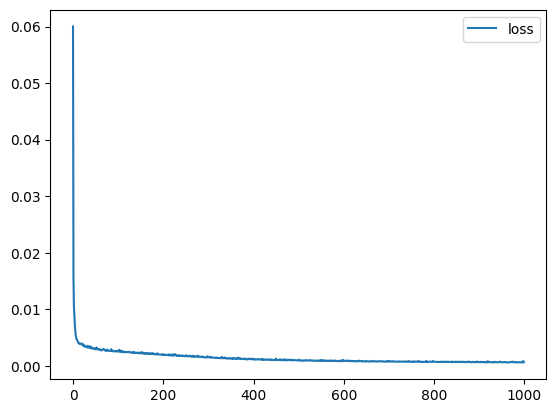

In [ ]:
pd.DataFrame(history_8.history).plot()

In [ ]:
x_input = df_multi3[-n_steps_in:].reshape(1, n_steps_in, n_features)

y_pred = model_8.predict(x_input, verbose=0)

y_pred_reshaped = y_pred.reshape(n_steps_out, n_features)

y_pred_original = scaler.inverse_transform(y_pred_reshaped)

print("Predicción escalada:", y_pred_reshaped)
print("Predicción original:", y_pred_original)


Predicción escalada: [[0.12489116 0.06149713 0.18960539]
 [0.10568744 0.07454881 0.180161  ]
 [0.08065107 0.06799965 0.15441558]]
Predicción original: [[64.826355 52.508892 77.40033 ]
 [61.09507  55.044834 75.565285]
 [56.230503 53.772335 70.56294 ]]
